In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [41]:
sns.set_style({'axes_labelcolor': 'white'})

In [42]:
x = pd.read_csv("C:/Users/Ian/Box Sync/Client/Baker Tilly/201901 ProdDev Initiative/"
                "2 - Work in Process/POIS-0202-Moixa/Data/scoredTrainingData.csv")

In [45]:
def Corr(feat_regx):
    df = x.filter(regex="{}.*".format(feat_regx), axis=1)
    data_corr = df.corr()
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(data_corr, dtype=np.bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(data_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [46]:
def performanceCorr(feat_regx):
    df1 = x.filter(regex="{}.*".format(feat_regx), axis=1)
    df = data[list(data.columns)[1:8]].join(df1)
    data_corr = df.corr()
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(data_corr, dtype=np.bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(data_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

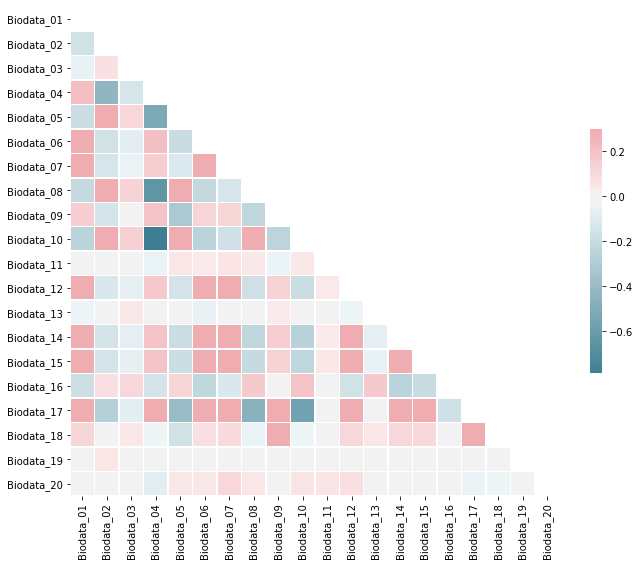

In [47]:
Corr('Biodata')

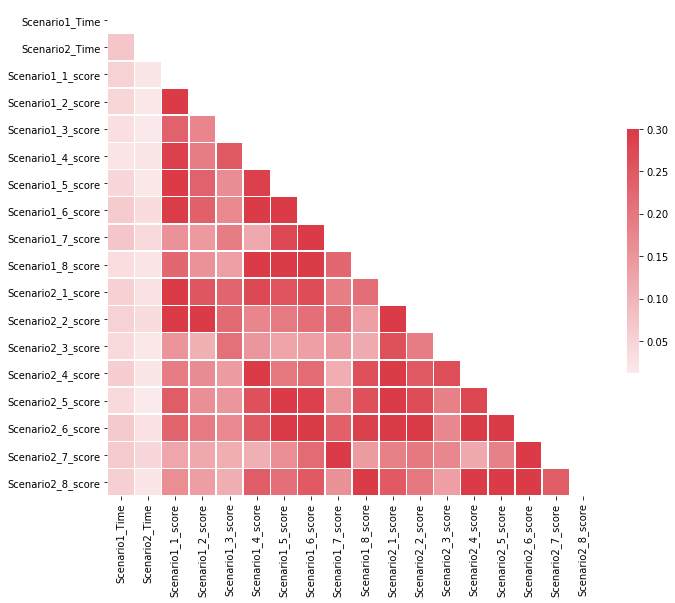

In [48]:
Corr('Scenario')

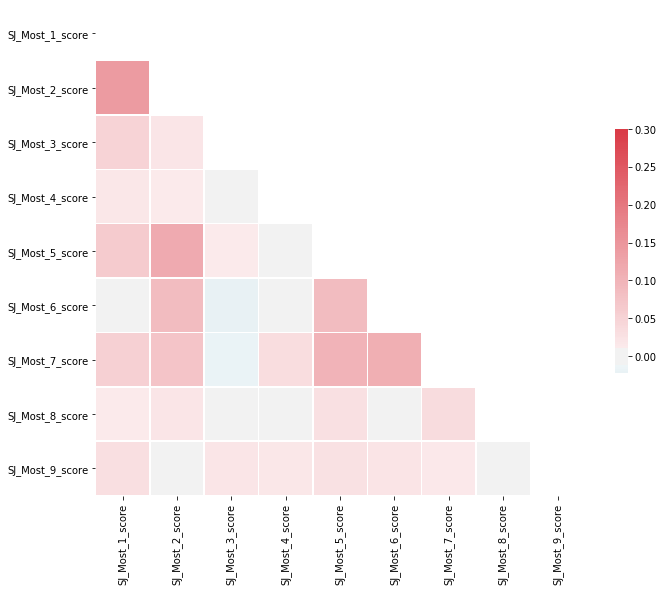

In [49]:
Corr('SJ_Most')

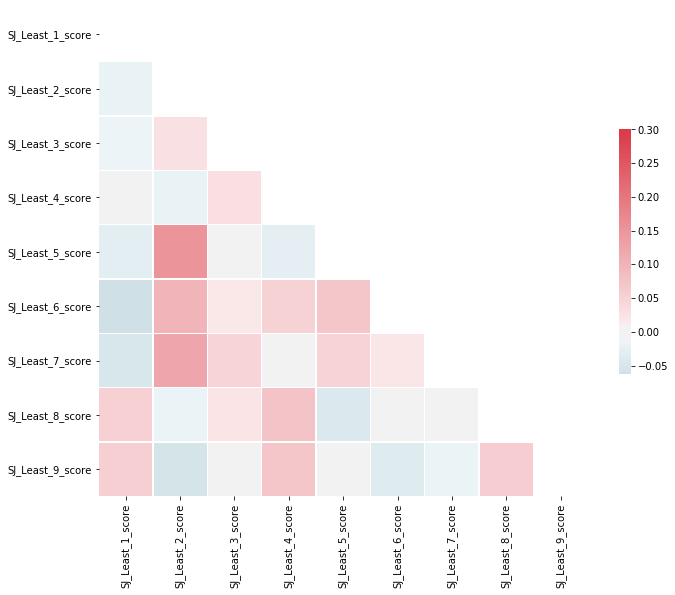

In [50]:
Corr('SJ_Least')

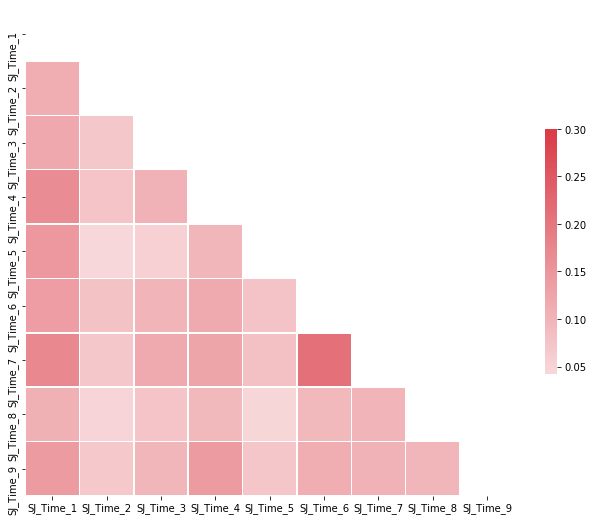

In [51]:
Corr('SJ_Time')

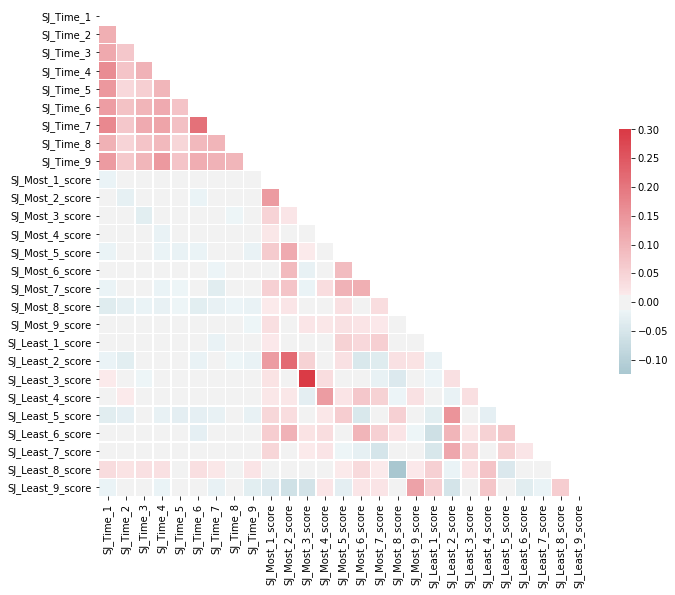

In [52]:
Corr('SJ_')

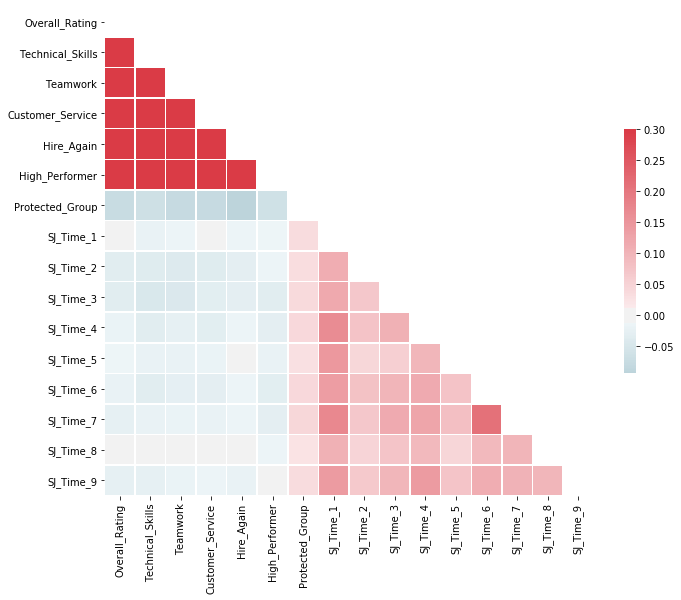

In [53]:
performanceCorr('SJ_Time')

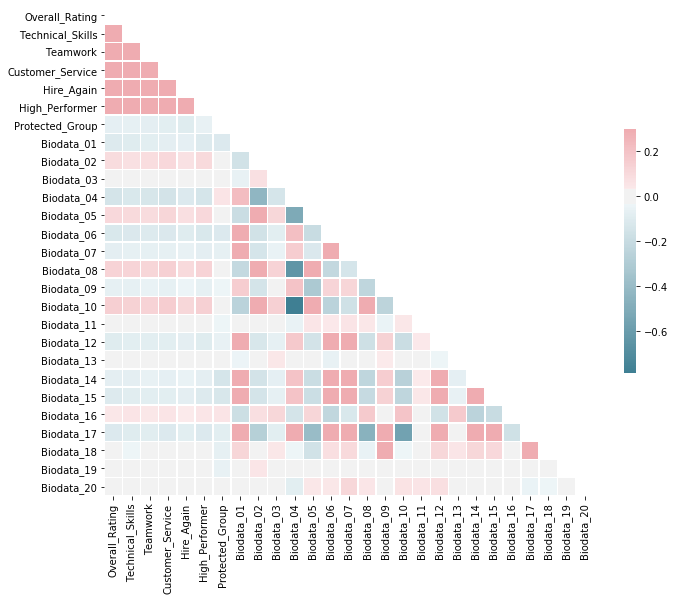

In [54]:
performanceCorr('Biodata')

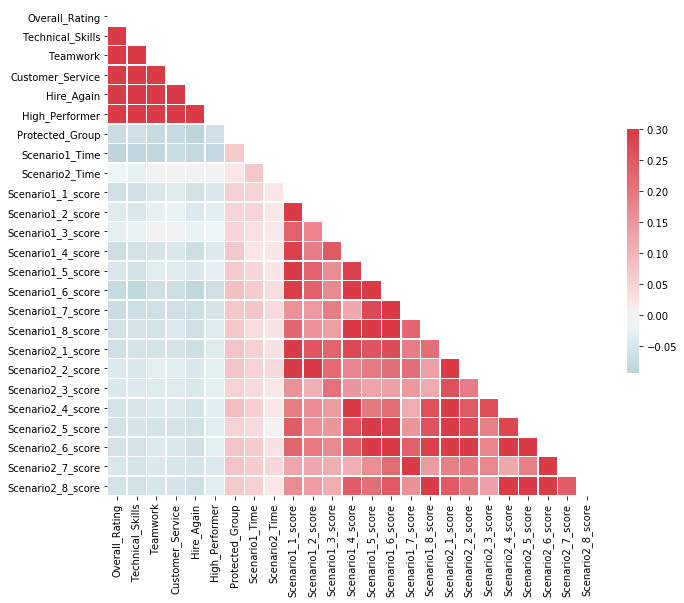

In [55]:
performanceCorr('Scenario')

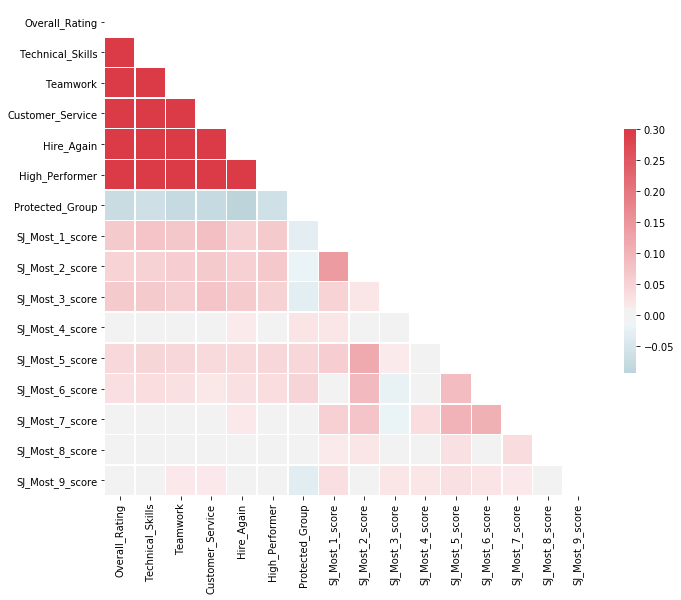

In [56]:
performanceCorr('SJ_Most')

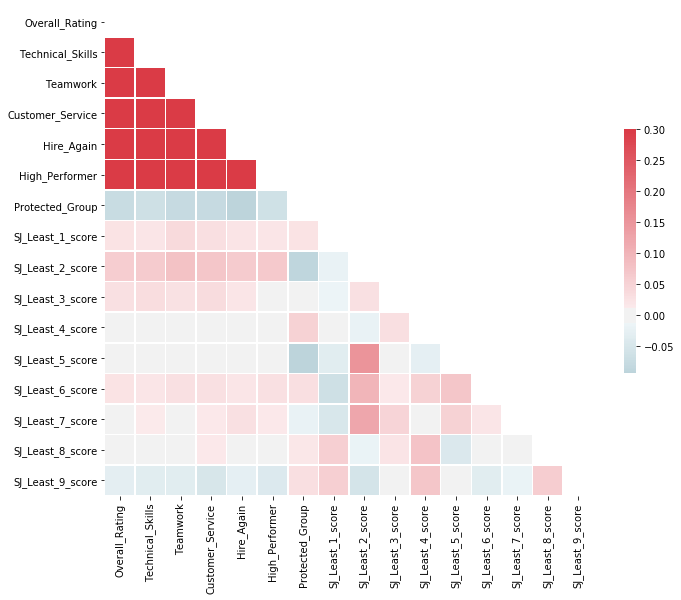

In [57]:
performanceCorr('SJ_Least')

In [61]:
def clusterWCSS(feat_regx, n_clusters):
    df = x.filter(regex="{}.*".format(feat_regx), axis=1).dropna(inplace=True)
    wcss = []
    for i in range(1, n_clusters):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, n_jobs=8)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, n_clusters), wcss)
    plt.title('Elbow Graph')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

In [62]:
def clustering(feat_regx, n_clusters):
    df = x.filter(regex="{}.*".format(feat_regx), axis=1).dropna(inplace=True)
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, n_jobs=8)
    kmeans.fit(df)
    pred = kmeans.predict(df)
    print(pred)
    return pred

In [63]:
clusterWCSS('Biodata', 10)

C:\Users\Ian\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


ValueError: Expected 2D array, got scalar array instead:
array=nan.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [64]:
clusters = clustering('Biodata', 4)

C:\Users\Ian\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


ValueError: Expected 2D array, got scalar array instead:
array=nan.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
clusters

In [ ]:
test = x.filter(regex='Biodata.*', axis=1)
test['cluster'] = clusters


In [ ]:
test.corr()
data_corr = test.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(data_corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
test.groupby('cluster').mean().T

In [ ]:
test.groupby('cluster').count().T
